In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import mysql.connector

In [2]:
df_cust=pd.read_csv("data/customers.csv")
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
df_cs=pd.read_csv("data/credit_profiles.csv")
df_trans=pd.read_csv("data/transactions.csv")


In [4]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [5]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [6]:
df_trans.shape

(500000, 7)

In [7]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",       # or your MySQL host
    user="root",
    password="root",
    database="e_master_card"
)

In [9]:
df_cust=pd.read_sql("select * from customers",conn)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [10]:
df_trans=pd.read_sql("select * from transactions",conn)
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,None,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [11]:
df_cs=pd.read_sql("select * from credit_profiles",conn)
df_cs

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [12]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [13]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

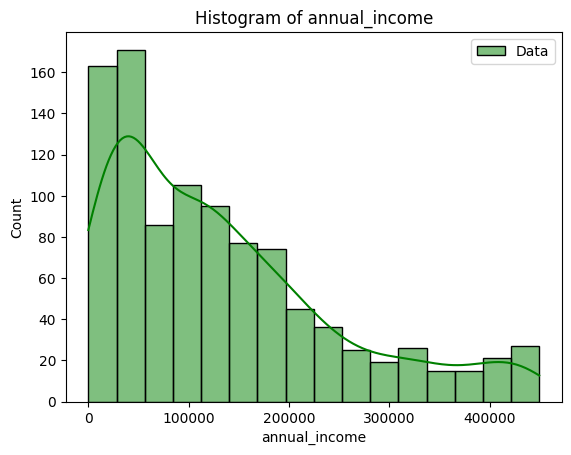

In [14]:
sns.histplot(df_cust.annual_income,kde=True,color="green",label="Data")
plt.title("Histogram of annual_income")
plt.legend()
plt.show()

In [15]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [16]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
31,32,Veer Mistry,Male,50,City,Business Owner,50,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married


In [17]:
occupatino_wise_inc_median=df_cust.groupby("occupation").annual_income.median()

In [18]:
occupatino_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [19]:
for index,row in df_cust.iterrows():
    if row["annual_income"]<100:
        df_cust.at[index,"annual_income"]=occupatino_wise_inc_median[row["occupation"]]

In [20]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [21]:
df_cust.loc[[14,31]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,44915.0,Married
31,32,Veer Mistry,Male,50,City,Business Owner,254881.0,Married


### Data Visualization

In [22]:
avg_income_per_occupation=df_cust.groupby("occupation").annual_income.mean()

In [23]:
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [24]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [25]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45239.84210526, 268119.83391003,  59927.25773196,
       136208.60326087,  76293.08991228,  78618.38513514])

### Occupation wise Analysis

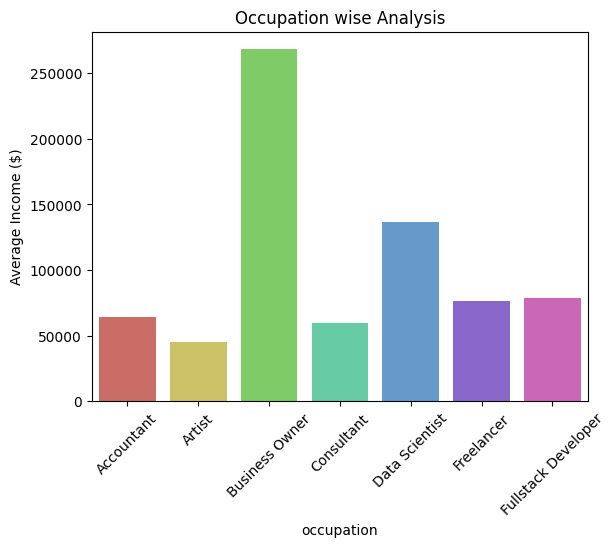

In [26]:
sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values,palette="hls")
plt.title("Occupation wise Analysis")
plt.ylabel("Average Income ($)")
plt.xticks(rotation=45)
plt.show()

### Gender wise Analysis

In [27]:
avg_income_per_gender=df_cust.groupby("gender").annual_income.mean()

In [28]:
avg_income_per_gender

gender
Female    129745.226994
Male      145163.874629
Name: annual_income, dtype: float64

In [29]:
avg_income_per_gender.index

Index(['Female', 'Male'], dtype='object', name='gender')

In [30]:
avg_income_per_gender.values

array([129745.22699387, 145163.87462908])

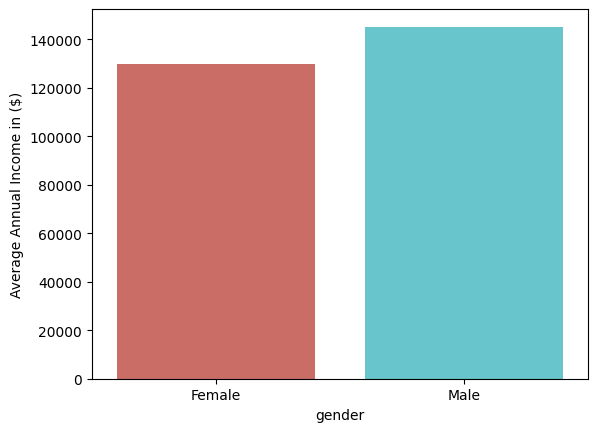

In [31]:
sns.barplot(x=avg_income_per_gender.index,y=avg_income_per_gender.values,palette="hls")
plt.ylabel("Average Annual Income in ($)")
plt.show()

In [32]:
df_cust.location.unique()

array(['City', 'Rural', 'Suburb'], dtype=object)

In [33]:
avg_income_per_location=df_cust.groupby("location").annual_income.mean()
avg_income_per_location

location
City      140310.866764
Rural     124579.800000
Suburb    145326.683190
Name: annual_income, dtype: float64

In [34]:
avg_income_per_location.index

Index(['City', 'Rural', 'Suburb'], dtype='object', name='location')

In [35]:
avg_income_per_location.values

array([140310.86676428, 124579.8       , 145326.68318966])

### Location wise Analysis

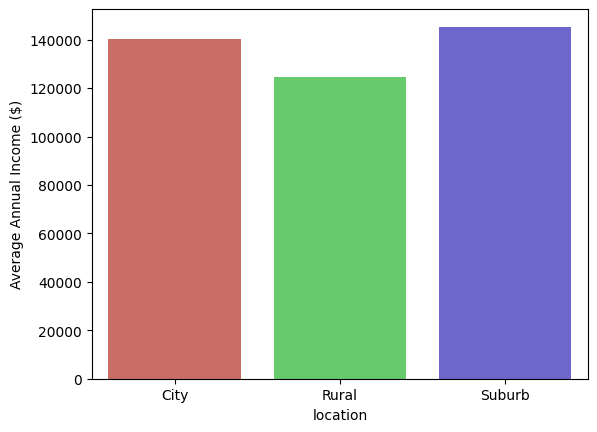

In [36]:
sns.barplot(x=avg_income_per_location.index,y=avg_income_per_location.values,palette="hls")
plt.ylabel("Average Annual Income ($)")
plt.show()

### Marital Status wise Analysis

In [37]:
avg_income_per_martial_status=df_cust.groupby("marital_status").annual_income.mean()
avg_income_per_martial_status

marital_status
Married    140123.202581
Single     140186.282222
Name: annual_income, dtype: float64

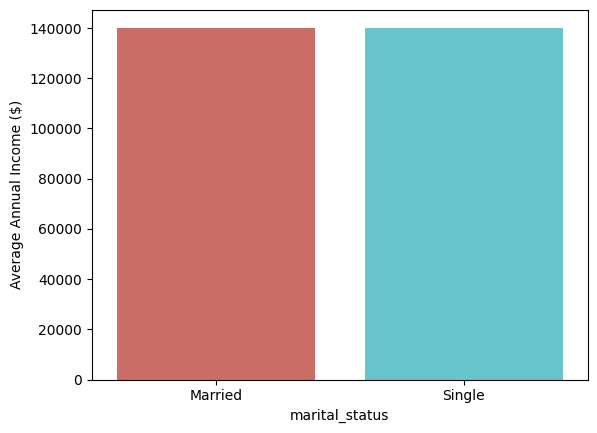

In [38]:
sns.barplot(x=avg_income_per_martial_status.index,y=avg_income_per_martial_status.values,palette="hls")
plt.ylabel("Average Annual Income ($)")
plt.show()

### All Analysis in One Time

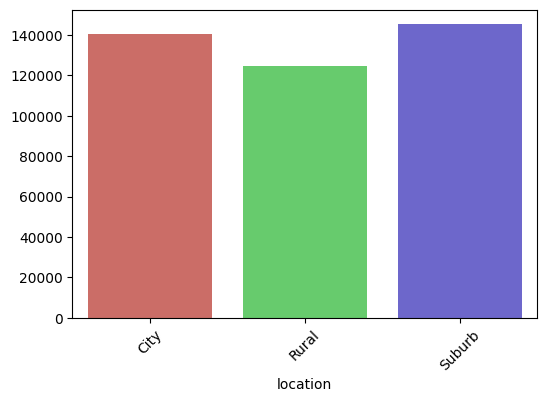

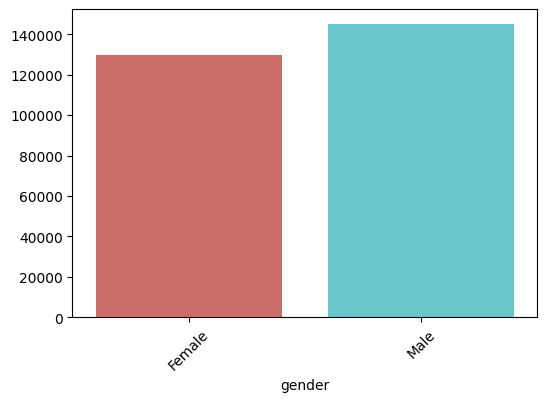

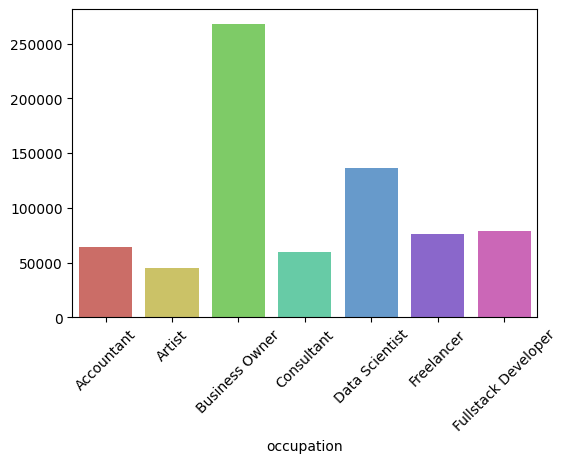

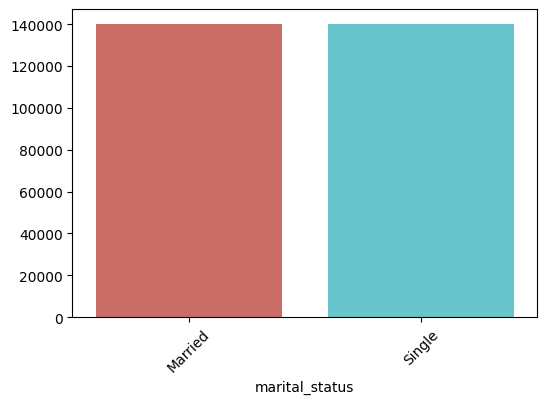

In [39]:
columns=["location","gender","occupation","marital_status"]
for col in columns:
    avg_income=df_cust.groupby(col).annual_income.mean()
    plt.figure(figsize=(6,4))
    sns.barplot(x=avg_income.index,y=avg_income.values,palette="hls")
    plt.xticks(rotation=45)
    avg_income=[]

<h3 style="color:blue;">2. Analyze Age Column</h3>
first let us check if there are any null values in the Age column

In [40]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [41]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

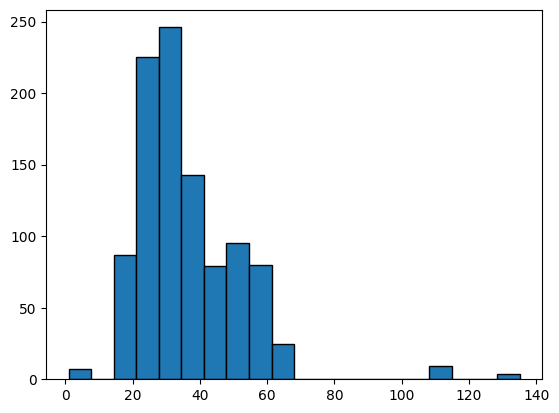

In [42]:
plt.hist(df_cust.age,edgecolor="black",bins=20)
plt.show()

In [43]:
outliers=df_cust[(df_cust.age<15 )|(df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [44]:
df_cust.groupby("occupation").age.median()

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [45]:
median_age_per_occupation= df_cust.groupby("occupation").age.median()

In [46]:
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [47]:
for index ,row in outliers.iterrows():
    df_cust.at[index,"age"]=median_age_per_occupation[row["occupation"]]

In [48]:
df_cust[(df_cust.age<15 )|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [49]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [50]:
# Define the bins edges and labels
bin_edges=[17,25,48,65]
bin_labels=['18-25','26-48','49-65']

# Use the cut function to bin and label the age column
df_cust["age_group"]=pd.cut(df_cust['age'],bins=bin_edges,labels=bin_labels)

In [51]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [52]:
age_group_counts=df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

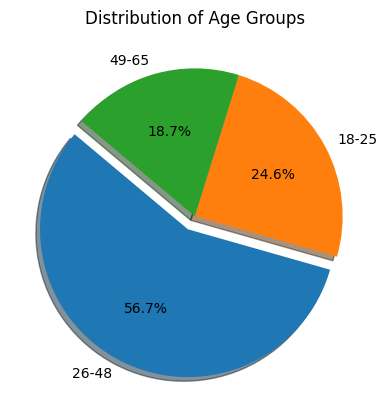

In [53]:
plt.pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct="%1.1f%%",
    shadow=True,
    explode=(0.1,0,0),
    startangle=140
)
plt.title("Distribution of Age Groups")
plt.show()

In [54]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [55]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [56]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [57]:
df_cust.groupby(['location','gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [58]:
df_cust.groupby(['location','gender']).size().unstack()

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


In [59]:
customer_location_gender=df_cust.groupby(['location','gender']).size().unstack()

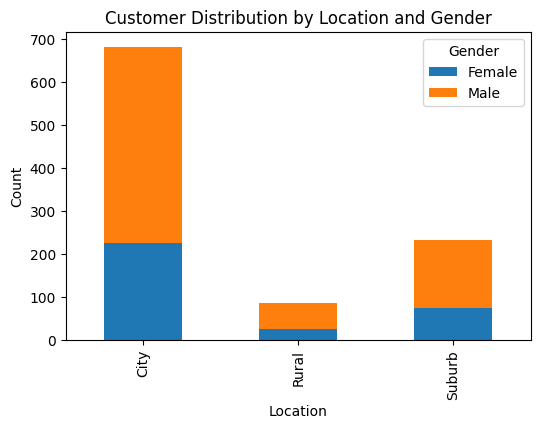

In [60]:
customer_location_gender.plot(kind="bar",stacked=True,figsize=(6,4))
plt.title("Customer Distribution by Location and Gender")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

<h3 style="color:violet;">Explore Credit Score Table</h3>

In [61]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [62]:
df_cs.shape

(1004, 6)

In [63]:
df_cust.shape

(1000, 9)

In [64]:
df_cs[df_cs["cust_id"].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [65]:
df_cs_clean_1=df_cs.drop_duplicates(subset="cust_id",keep="last")
df_cs_clean_1.shape

(1000, 6)

In [66]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [67]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [68]:
df_cs_clean_1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

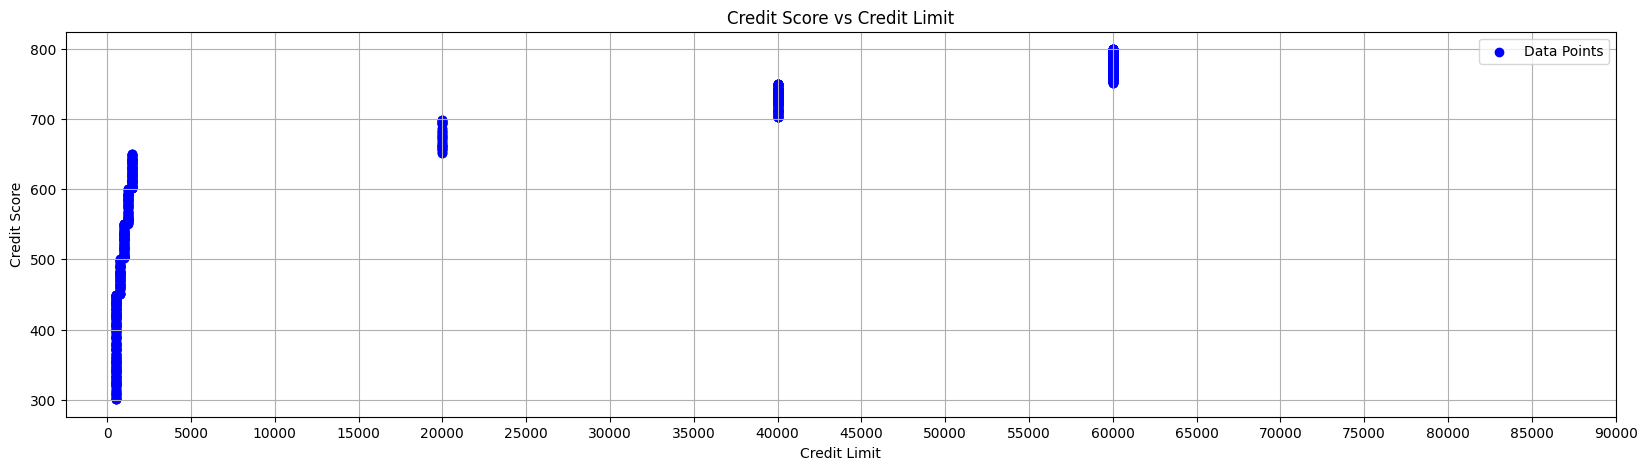

In [69]:
plt.figure(figsize=(20,5))
plt.scatter(df_cs_clean_1.credit_limit,df_cs_clean_1.credit_score,c='blue', label='Data Points')
plt.title("Credit Score vs Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")

plt.xticks(range(0,90001,5000))

plt.grid(True)
plt.legend()
plt.show()

In [70]:
bin_ranges=[300,450,500,550,600,650,700,750,800]
bin_labels=[f'{start}-{end-1}'for start ,end in zip(bin_ranges, bin_ranges[1:])]
bin_labels

['300-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [71]:
pd.cut(df_cs_clean_1['credit_score'],bins=bin_ranges,labels=bin_labels,include_lowest=True,right=False)

0       700-749
1       550-599
2       500-549
3       500-549
4       700-749
         ...   
999     550-599
1000    750-799
1001    500-549
1002    700-749
1003    750-799
Name: credit_score, Length: 1000, dtype: category
Categories (8, object): ['300-449' < '450-499' < '500-549' < '550-599' < '600-649' < '650-699' < '700-749' < '750-799']

In [72]:
df_cs_clean_1["credit_score_range"]=pd.cut(df_cs_clean_1['credit_score'],bins=bin_ranges,labels=bin_labels,include_lowest=True,right=False)

In [73]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [74]:
df_cs_clean_1[df_cs_clean_1.credit_score_range=="700-749"][df_cs_clean_1.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
64,65,734,0.473715,13631.0,0.0,NaN,700-749
83,84,733,0.525567,16663.0,1.0,NaN,700-749
159,160,709,0.759795,18244.0,0.0,NaN,700-749
167,168,737,0.489797,12421.0,2.0,NaN,700-749
278,279,741,0.352932,10846.0,1.0,NaN,700-749
301,302,722,0.608076,122402.0,4.0,NaN,700-749
342,343,733,0.646581,20948.0,2.0,NaN,700-749
351,352,736,0.367879,9916.0,2.0,NaN,700-749
505,506,722,0.745946,25243.0,3.0,NaN,700-749
690,687,736,0.738382,17882.0,3.0,NaN,700-749


In [75]:
df_cs_clean_1[df_cs_clean_1.credit_score_range=="700-749"].credit_limit.mode()

0    40000.0
Name: credit_limit, dtype: float64

In [76]:
mode_df=df_cs_clean_1.groupby("credit_score_range")["credit_limit"].agg(lambda x:x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [77]:
df_cs_clean_2=pd.merge(df_cs_clean_1,mode_df, on="credit_score_range",suffixes=("","_mode"))

In [78]:
df_cs_clean_2[df_cs_clean_2.credit_limit.isna()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
400,401,420,0.319390,139.0,0.0,NaN,300-449,500.0
126,127,522,0.287678,204.0,4.0,NaN,500-549,1000.0
211,212,337,0.608700,226.0,4.0,NaN,300-449,500.0


In [79]:
df_cs_clean_3=df_cs_clean_2.copy()
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [80]:
df_cs_clean_3["credit_limit"].fillna(df_cs_clean_3.credit_limit_mode,inplace=True)

In [81]:
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [82]:
df_cs_clean_3.loc[[107,676]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
107,108,500,0.776230,448.0,2.0,1000.0,500-549,1000.0
676,677,300,0.785509,341.0,1.0,500.0,300-449,500.0


In [83]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


### Replacing outliers of the outstanding_dept with credit_limit

<Axes: xlabel='outstanding_debt'>

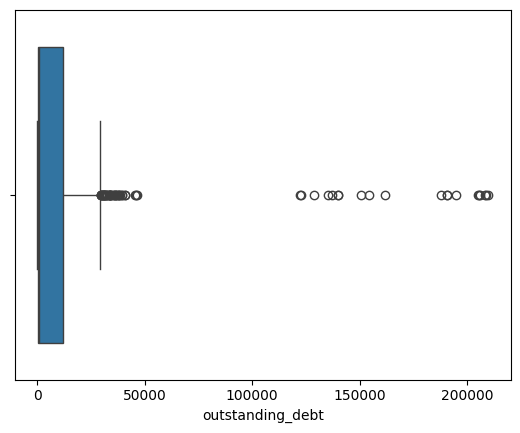

In [84]:
sns.boxplot(x=df_cs_clean_3.outstanding_debt)

In [85]:
df_cs_clean_3[df_cs_clean_3.credit_limit<df_cs_clean_3.outstanding_debt]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [86]:
df_cs_clean_3.loc[df_cs_clean_3.credit_limit<df_cs_clean_3.outstanding_debt,"outstanding_debt"]=df_cs_clean_3.credit_limit

In [87]:
df_cs_clean_3.iloc[862]

cust_id                                863
credit_score                           792
credit_utilisation                0.399555
outstanding_debt                   60000.0
credit_inquiries_last_6_months         3.0
credit_limit                       60000.0
credit_score_range                 750-799
credit_limit_mode                  60000.0
Name: 862, dtype: object

In [88]:
df_merged=df_cust.merge(df_cs_clean_3,on="cust_id",how="inner")

In [89]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [90]:
numerical_cols=["credit_score","credit_utilisation","outstanding_debt","credit_limit","annual_income","age"]
correlation_matrix=df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575685,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086816,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555077,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684627,0.510993
annual_income,0.575685,-0.086816,0.555077,0.684627,1.000000,0.618136
age,0.444917,-0.027713,0.444301,0.510993,0.618136,1.000000


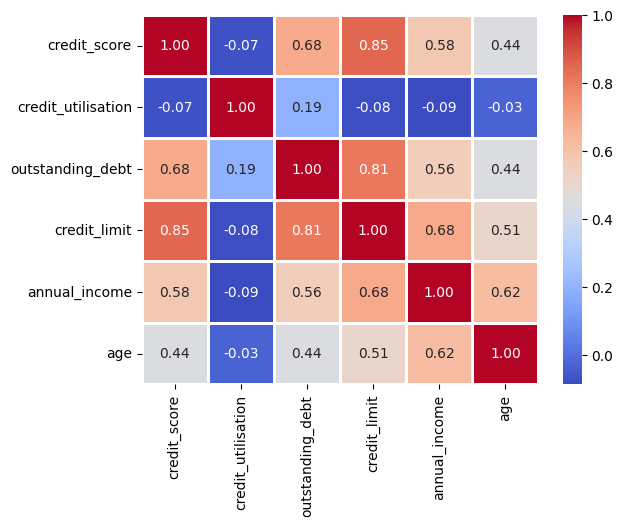

In [91]:
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.8)
plt.show()

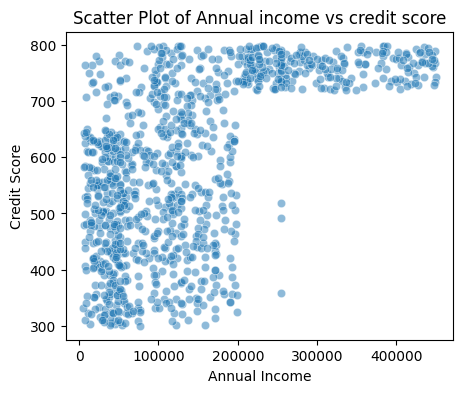

In [118]:
# Just looking if there is any relation between annual_income and credit score
plt.figure(figsize=(5, 4))
sns.scatterplot(x='annual_income', y='credit_score', data=df_merged, alpha=0.5)
plt.title('Scatter Plot of Annual income vs credit score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

<h1 style="text-align:center; color:blue">Transactions Table</h1>

In [92]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [93]:
df_trans.shape

(500000, 7)

In [94]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [95]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [96]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

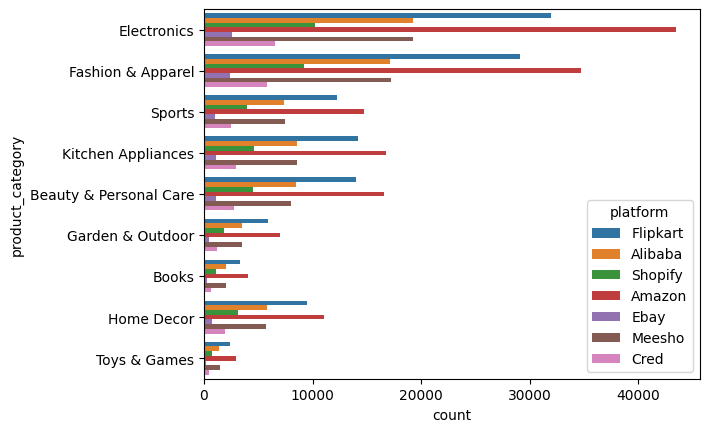

In [97]:
sns.countplot(y="product_category",hue="platform",data=df_trans)

In [98]:
df_trans.platform.mode()

0    Amazon
Name: platform, dtype: object

In [99]:
df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)

In [100]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

<Axes: xlabel='count', ylabel='product_category'>

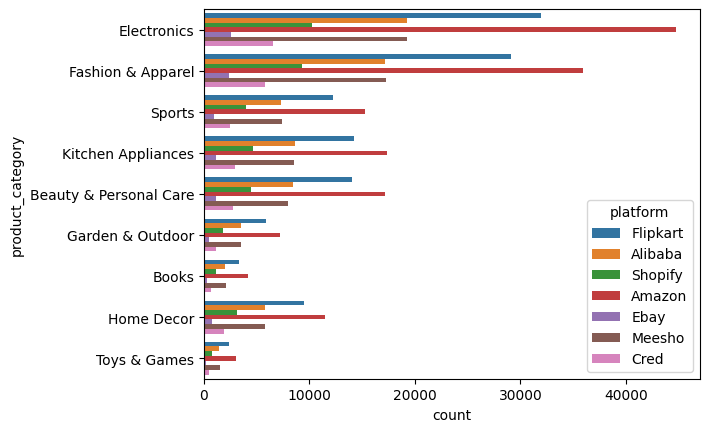

In [101]:
sns.countplot(y="product_category",hue="platform",data=df_trans)

### Data Cleaning Step 2: Treat Outliers: tran_amount

In [105]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [119]:
df_trans_zero = df_trans[df_trans.tran_amount==0]
df_trans_zero.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card


In [120]:
df_trans_zero.shape

(4734, 7)

In [121]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [122]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [123]:
df_trans_1 = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_1.shape

(15637, 7)

In [124]:
df_trans_1[df_trans_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [125]:
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

np.float64(554.0)

In [126]:
df_trans['tran_amount'].replace(0,median_to_replace, inplace=True)

In [127]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [128]:
df_trans.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [129]:
df_trans[df_trans['tran_amount']<1000].describe()

,tran_id,cust_id,tran_amount
count,475000.000000,475000.000000,475000.000000
mean,250041.699922,501.375499,240.667608
std,144285.259913,288.606185,244.487110
min,1.000000,1.000000,2.000000
25%,125126.750000,252.000000,63.000000
50%,250100.500000,502.000000,131.000000
75%,374928.250000,751.000000,348.000000
max,500000.000000,1000.000000,999.000000


In [130]:
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [131]:
df_trans[df_trans.tran_amount<upper].tran_amount.max()

np.int64(999)

In [132]:
df_trans[df_trans.tran_amount>upper].tran_amount.min()

np.int64(50000)

In [133]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [134]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [135]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [136]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [137]:
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [138]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [139]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


You can now see that we got rid of outliers from tran_amount column. Great job folks 👍🏼🔥🔥

<Axes: xlabel='tran_amount', ylabel='Count'>

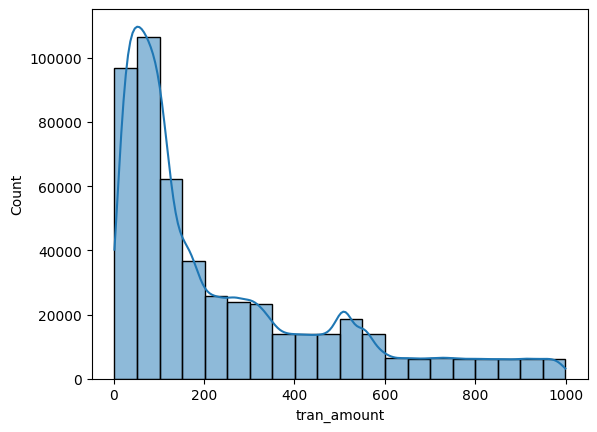

In [140]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

In [143]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


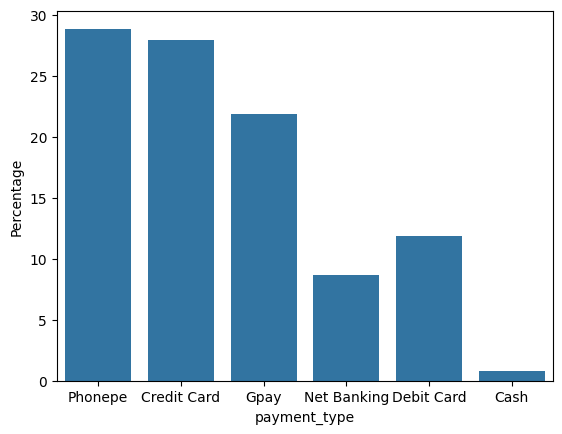

In [148]:
sns.countplot(x=df_trans.payment_type,stat="percent")
plt.ylabel("Percentage")
plt.show()

In [152]:
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [151]:
df_merged_2=pd.merge(df_merged,df_trans,on="cust_id",how="inner")
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


In [153]:
df_merged_2.shape

(500000, 22)

<Axes: xlabel='age_group', ylabel='count'>

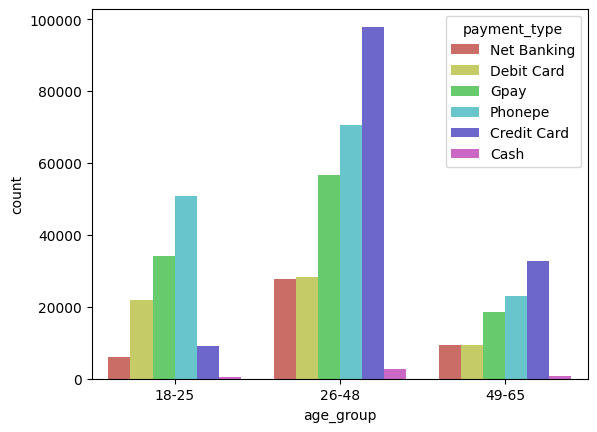

In [158]:
sns.countplot(x="age_group",hue="payment_type",data=df_merged_2,palette="hls")

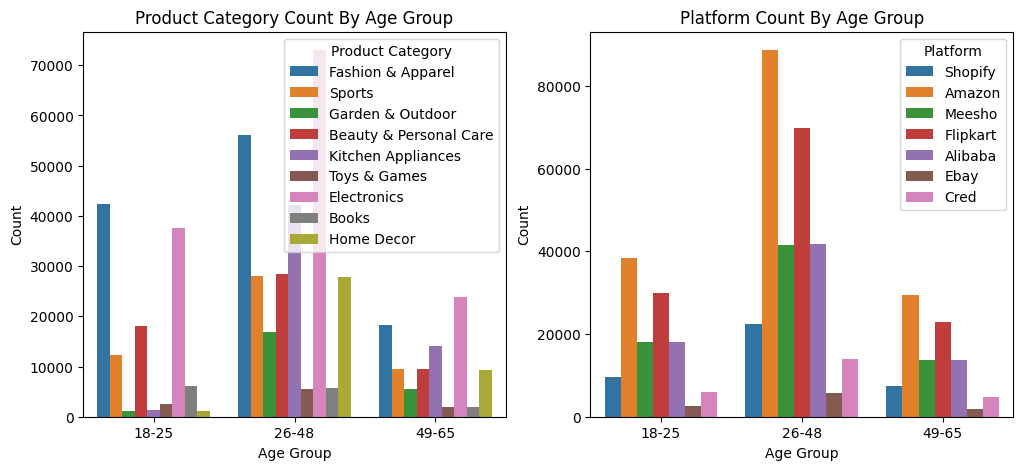

In [167]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="age_group",hue="product_category",data=df_merged_2,ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category" ,loc="upper right")

sns.countplot(x="age_group",hue="platform",data=df_merged_2,ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Platform" ,loc="upper right")
plt.show()

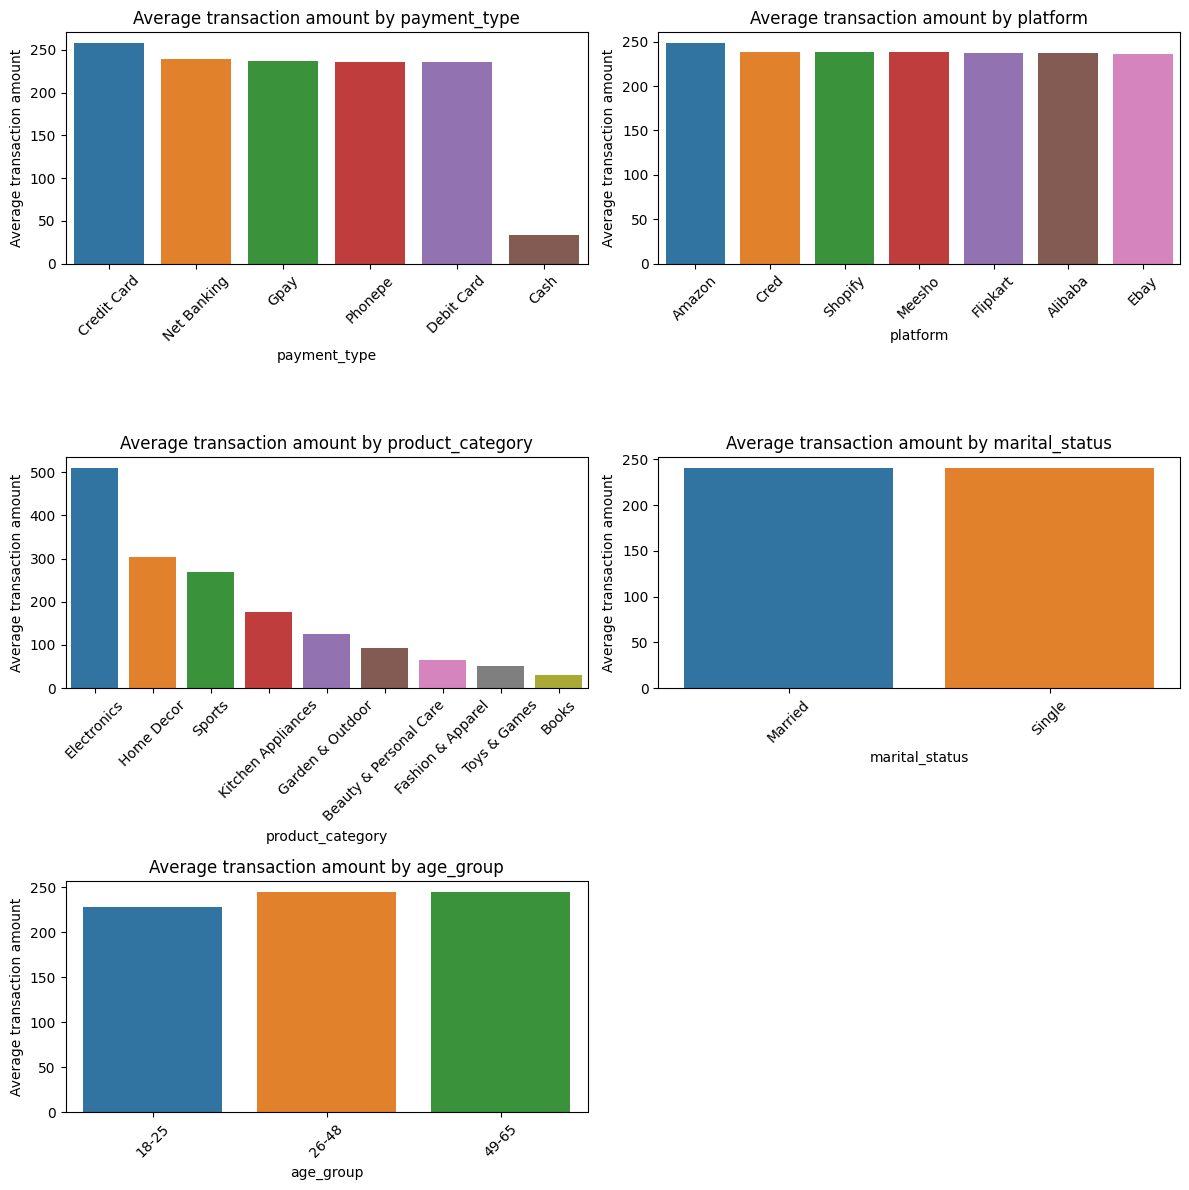

In [168]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [169]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,36969.670732,1130.081301,484.451220
1,26-48,145437.104938,20560.846561,597.569665
2,49-65,259786.192513,41699.197861,701.524064


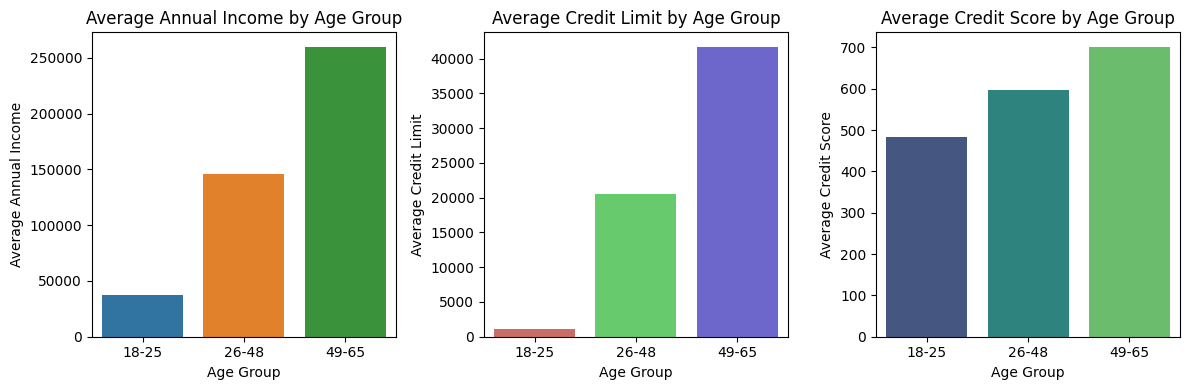

In [170]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care